Epoch 0, Loss: 8.6683
Epoch 2000, Loss: 0.1157
Epoch 4000, Loss: 0.0787
Epoch 6000, Loss: 0.0593
Epoch 8000, Loss: 0.0485
Epoch 10000, Loss: 0.0416
Epoch 12000, Loss: 0.0367
Epoch 14000, Loss: 0.0328
Epoch 16000, Loss: 0.0295
Epoch 18000, Loss: 0.0266
Epoch 20000, Loss: 0.0241
Epoch 22000, Loss: 0.0219
Epoch 24000, Loss: 0.0199
Epoch 26000, Loss: 0.0182
Epoch 28000, Loss: 0.0168
Epoch 30000, Loss: 0.0155
Epoch 32000, Loss: 0.0144
Epoch 34000, Loss: 0.0134
Epoch 36000, Loss: 0.0125
Epoch 38000, Loss: 0.0118
Epoch 40000, Loss: 0.0111
Epoch 42000, Loss: 0.0106
Epoch 44000, Loss: 0.0101
Epoch 46000, Loss: 0.0096
Epoch 48000, Loss: 0.0093


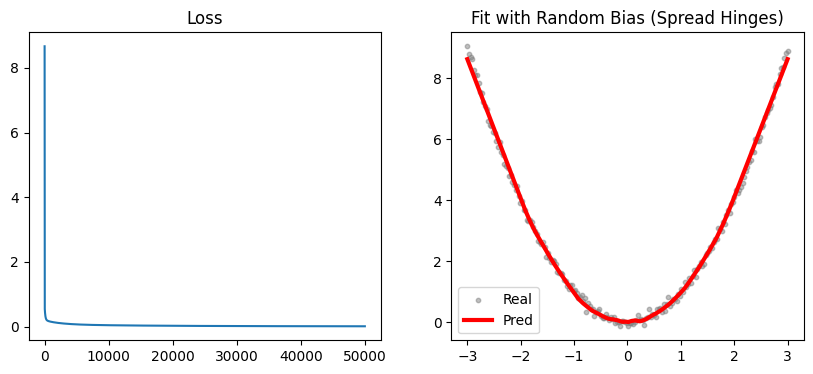

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 准备数据
np.random.seed(42)
N = 200
X = np.linspace(-3, 3, N).reshape(-1, 1)
Y = X**2 + 0.1 * np.random.randn(N, 1)

# 参数设置
input_size = 1
hidden_size = 200 
output_size = 1
learning_rate = 0.001 # 稍微调大一点，因为我们有 Clip 保护

# ==========================================
# 核心修改：Bias 初始化
# ==========================================
# 权重依然用 He Initialization
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0/input_size)

# 【关键点】B1 不再是 0，而是随机分布！
# 这会让 ReLU 的激活点（拐点）散布在输入数据的范围内
# 我们的输入 X 是 -3 到 3，所以 Bias 大概设在类似范围能让拐点散开
B1 = np.random.uniform(-1, 1, (1, hidden_size)) 

W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0/hidden_size)
B2 = np.zeros((1, output_size))

epochs = 50000 
loss_history = []

for i in range(epochs):
    # --- 前向 ---
    Z1 = np.dot(X, W1) + B1
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(A1, W2) + B2
    Y_hat = Z2
    
    # Loss
    loss = np.mean(0.5 * (Y_hat - Y)**2)
    loss_history.append(loss)
    
    # --- 反向 ---
    dZ2 = (Y_hat - Y)
    
    dW2 = np.dot(A1.T, dZ2) / N
    dB2 = np.sum(dZ2, axis=0, keepdims=True) / N
    
    dA1 = np.dot(dZ2, W2.T)
    relu_derivative = (Z1 > 0).astype(float)
    dZ1 = dA1 * relu_derivative
    
    dW1 = np.dot(X.T, dZ1) / N
    dB1 = np.sum(dZ1, axis=0, keepdims=True) / N
    
    # --- 梯度裁剪 (保持这个好习惯) ---
    np.clip(dW1, -1, 1, out=dW1)
    np.clip(dB1, -1, 1, out=dB1)
    np.clip(dW2, -1, 1, out=dW2)
    np.clip(dB2, -1, 1, out=dB2)
    
    # --- 更新 ---
    W1 -= learning_rate * dW1
    B1 -= learning_rate * dB1
    W2 -= learning_rate * dW2
    B2 -= learning_rate * dB2
    
    if i % 2000 == 0:
        print(f"Epoch {i}, Loss: {loss:.4f}")

# 可视化
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Loss")
plt.subplot(1, 2, 2)
plt.scatter(X, Y, s=10, c='gray', alpha=0.5, label='Real')
plt.plot(X, Y_hat, 'r-', linewidth=3, label='Pred')
plt.title(f"Fit with Random Bias (Spread Hinges)")
plt.legend()
plt.show()

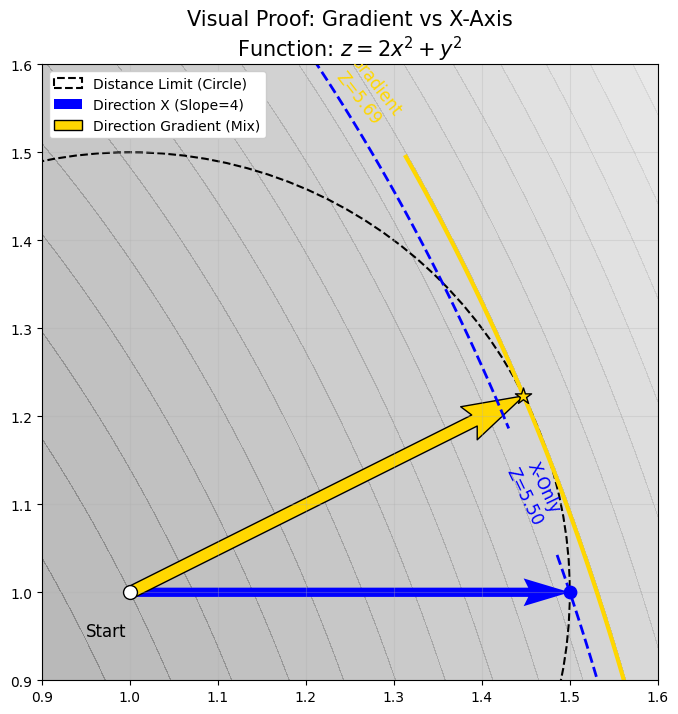

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 定义函数 z = 2x^2 + y^2
def f(x, y):
    return 2 * x**2 + y**2

# 设置中心点和步长
x0, y0 = 1.0, 1.0
step_size = 0.5  # 步长限制（棍子长度）

# 计算导数和向量
df_dx = 4 * x0  # 4
df_dy = 2 * y0  # 2
grad_vec = np.array([df_dx, df_dy])
grad_dir = grad_vec / np.linalg.norm(grad_vec)  # 归一化梯度方向
x_dir = np.array([1, 0])  # X轴方向

# 计算两个终点的位置
p_grad = np.array([x0, y0]) + grad_dir * step_size  # 沿着梯度走的终点
p_xonly = np.array([x0, y0]) + x_dir * step_size    # 沿着X轴走的终点

# 计算两个终点的高度 (Z值)
z_start = f(x0, y0)
z_grad = f(p_grad[0], p_grad[1])   # 梯度终点的高度
z_xonly = f(p_xonly[0], p_xonly[1]) # X轴终点的高度

# --- 绘图准备 ---
fig, ax = plt.subplots(figsize=(10, 8))

# 生成背景网格
x_range = np.linspace(0.8, 1.8, 200)
y_range = np.linspace(0.8, 1.8, 200)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# 1. 画背景热力图 (颜色越红越高)
plt.contourf(X, Y, Z, levels=30, cmap='gray', alpha=0.3)

# 2. 画出限制圆 (你只能走这么远)
circle = plt.Circle((x0, y0), step_size, color='black', fill=False, linestyle='--', linewidth=1.5, label='Distance Limit (Circle)')
ax.add_patch(circle)

# 3. 关键对比：画出两个终点所在的等高线
# 输家线 (Blue Dashed)
contour_loser = ax.contour(X, Y, Z, levels=[z_xonly], colors='blue', linestyles='dashed', linewidths=2)
ax.clabel(contour_loser, fmt=f'X-Only\nZ={z_xonly:.2f}', inline=True, fontsize=12, manual=[(1.6, 1.2)])

# 赢家线 (Gold Solid)
contour_winner = ax.contour(X, Y, Z, levels=[z_grad], colors='gold', linestyles='solid', linewidths=3)
ax.clabel(contour_winner, fmt=f'Gradient\nZ={z_grad:.2f}', inline=True, fontsize=12, manual=[(1.3, 1.6)])

# 4. 画箭头
# 起点
ax.scatter(x0, y0, color='white', edgecolors='black', s=100, zorder=10)
ax.text(x0-0.05, y0-0.05, "Start", fontsize=12, color='black')

# 箭头 A: 只走 X 轴
ax.quiver(x0, y0, step_size, 0, angles='xy', scale_units='xy', scale=1, color='blue', width=0.015, label='Direction X (Slope=4)')
ax.scatter(p_xonly[0], p_xonly[1], color='blue', s=80, zorder=10)

# 箭头 B: 走梯度方向
dx = p_grad[0] - x0
dy = p_grad[1] - y0
ax.quiver(x0, y0, dx, dy, angles='xy', scale_units='xy', scale=1, color='gold', edgecolor='black', linewidth=1, width=0.02, label='Direction Gradient (Mix)')
ax.scatter(p_grad[0], p_grad[1], color='gold', edgecolors='black', s=150, zorder=10, marker='*')

# 设置显示
ax.set_aspect('equal')
ax.set_xlim(0.9, 1.6)
ax.set_ylim(0.9, 1.6)
ax.set_title(f"Visual Proof: Gradient vs X-Axis\nFunction: $z = 2x^2 + y^2$", fontsize=15)
ax.legend(loc='upper left', framealpha=1)
ax.grid(True, alpha=0.3)

plt.show()